In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None,header=None)
    return func
read_csv = no_index_read()

test_in = read_csv("test_in.csv")
test_out = read_csv("test_out.csv")
train_in = read_csv("train_in.csv")
train_out = read_csv("train_out.csv")
digits = sorted(list(set(train_out.values.flatten())))

train_in.shape

(1707, 256)

---
![Perceptron Model](../img/perceptron.png)

In [14]:
#PERCEPTRON
df_x = train_in.copy(deep=True)
df_x["bias"] = 1
x = df_x.values

in_shape = x.shape[1]
out_shape = len(digits)
w = np.random.random([in_shape,out_shape])

def perceptron(x:np.ndarray,weights:np.ndarray):
    if not isinstance(x,np.ndarray):
        print("x should be an ndarray")
        return 
    assert(isinstance(x,np.ndarray))
    return np.argmax(np.dot(x,weights),axis=1)
x.shape,w.shape,train_out.shape,perceptron(x,w).shape,"shapes look good!"

((1707, 257), (257, 10), (1707, 1), (1707,), 'shapes look good!')

In [15]:
#LOSS
y = perceptron(x,w)

def loss(y_pred,y_real):
    return np.sum((y_real-y_pred)**2)
y_real = train_out.values.flatten()
loss(y,y_real)


22496

In [22]:
#GRADIENTS
def gradients(x,w,y):
    # for one input x we have  L(x)= Σ(i)(y- w(i)*x(i))^2 ->
    # for each wi we get gradiend(L) with regard to wi = -2*xi
    # which means the total gradient = -2*x(y-wixi)
    # so an average gradient for all the dataset would be -2*avg(x)
    # so sum over 1700 x's and divide with x.shape[1] (257) so also bias wieght
    targets = np.zeros((x.shape[0],w.shape[1]))
    trues = targets.copy()

    preds = perceptron(x,w)                     # format: 6

    targets[np.arange(preds.size),preds]=1
    trues[np.arange(y.size),y]=1                # format: [0,0,0,0,0,0,1,0,0,0]

    diff = trues - targets
    x_diff = np.matmul(x.T,diff)
    avg = x_diff/x.shape[1]
    return -2*avg

def grad_generator(x,y_real):
    def func(w):
        return gradients(x,w,y_real)
    return func
train_grads = grad_generator(x,y_real)

In [56]:
#WEIGHT UPDATE
lr = 0.6
def weight_update(w,lr=0.1):
    grad = train_grads(w)
    update = -lr*grad
    return w + update
losses = []
wnew = w.copy()
y_pred = perceptron(x,wnew)
l = loss(y_pred,y_real)
limit = 1000
loss_goal = 1
while l>loss_goal:
    wnew = weight_update(wnew,lr)
    y_pred = perceptron(x,wnew)
    l = loss(y_pred,y_real)
    losses.append(l)
    if len(losses)>limit:
        break
y_pred = perceptron(x,wnew)
l = loss(y_pred,y_real)
print(f"Achieved loss {l} in {len(losses)} epochs with lr={lr}")


Achieved loss 0 in 365 epochs with lr=0.6


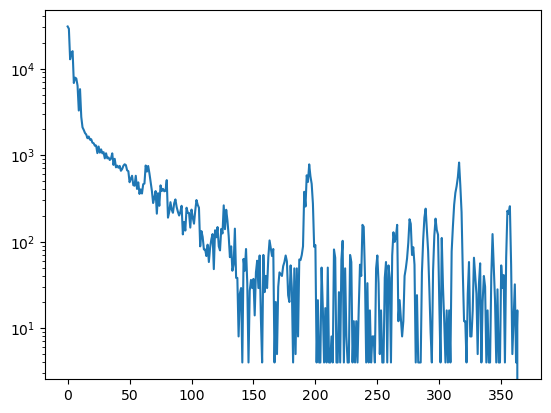

In [57]:
plt.plot(losses)
plt.yscale('log')